In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

pd.options.display.max_columns = 107

# Getting started

In [2]:
df = pd.read_csv('../listings.csv')

print(df.shape)
df.head(2)

(11250, 106)


/Users/Samantha/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20191112224534,2019-11-13,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,5245,https://www.airbnb.com/rooms/5245,20191112224534,2019-11-13,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,NaN,NaN,https://a0.muscache.com/im/pictures/5167505/b3...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Aust

## Cut out the garbage

In [3]:
# first: scrap the URLs and ID numbers
url_id_columns = ['id', 'listing_url', 'scrape_id', 'thumbnail_url',
                  'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
                  'host_url', 'host_thumbnail_url', 'host_picture_url']

df = df.drop(columns=url_id_columns)

print(df.shape)
df.head(2)

(11250, 95)


,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2019-11-13,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,2019-11-13,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07


In [4]:
# create a separate dataframe of text features for possible later analysis
# remove them from the main dataframe

text_columns = ['name', 'summary', 'space', 'description',
                'neighborhood_overview', 'notes', 'transit', 'access',
                'interaction', 'house_rules', 'host_name', 'host_about']

text_df = pd.DataFrame(data=df[text_columns])

df = df.drop(columns=text_columns)

text_df.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_about
0,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,Paddy,I am a long time resident of Austin. I earned ...
1,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,Paddy,I am a long time resident of Austin. I earned ...
2,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,Cute Private Studio apartment located in Willo...,Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Parking on street requires a permit. Permits ...,"Bus stop around the block. Uber, Lyft, Ride, ...",Guests have access to patio.,I am happy to welcome my guests and show them in.,No Pets allowed. No smoking in the room. No m...,Sylvia,I am a licensed Real Estate Broker and owner o...
3,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,Quiet neighborhood with lots of trees and good...,NaN,We are approximately 16 miles from downtown Au...,Gravel Parking Kitchen,We interact with our guests as little or as mu...,I will need to see identification at check in....,Elizabeth,We're easygoing professionals that enjoy meeti...
4,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",Travis Heights is one of the oldest neighborho...,Our calendar only extends a few months. If you...,"Parking for our place is on the street, roughl...",Private patio with lounge chairs and umbrella.,"You may see us during your stay, but you'll ma...",Posted prices include the 9% in local occupanc...,Todd,"We're a young family that likes to travel, we ..."


In [5]:
print(df.shape)
df.head()

(11250, 83)


,last_scraped,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2019-11-13,none,2008-08-23,"Austin, Texas, United States",within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,2019-11-13,none,2008-08-23,"Austin, Texas, United States",within a few hours,100%,NaN,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,2019-11-13,none,2009-02-16,"Austin, Texas, United States",within a few hours,100%,NaN,t,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,6 days ago,t,10,24,54,304,2019-11-13,508,47,2009-03-08,2019-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90
3,2019-11-13,none,2009-02-19,"Austin, Texas, United States",within an hour,100%,NaN,t,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729,NaN,Austin,TX,78729,Austin,"Austin, TX",US,United States,30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,2 days ago,t,0,3,13,13,2019-11-13,257,19,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,moderate,t,t,1,0,1,0,2.20
4,2019-11-1

In [6]:
# drop no-variance columns -- all values the same

empty_columns = ['experiences_offered', 'host_acceptance_rate',
                 'neighbourhood_group_cleansed', 'state', 'market',
                 'country_code', 'country', 'jurisdiction_names']

df = df.drop(columns=empty_columns)

print(df.shape)
df.head()

(11250, 75)


,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18
1,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,2019-11-13,2009-02-16,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,6 days ago,t,10,24,54,304,2019-11-13,508,47,2009-03-08,2019-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90
3,2019-11-13,2009-02-19,"Austin, Texas, United States",within an hour,100%,t,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729,Austin,78729,"Austin, TX",30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,2 days ago,t,0,3,13,13,2019-11-13,257,19,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,moderate,t,t,1,0,1,0,2.20
4,2019-11-13,2009-04-17,"Austin, Texas, United States",within an hour,100%,t,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Austin, TX, United States",Travis Heights,78704,Austin,78704,"Austin, TX",30.24829,-97.73726,t,Guesthouse,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",550.0,$99.00,$700

## Clean the data

In [12]:
# 'relevant' here refers to actual use in the model -- expanding over time
relevant_cols = ['bedrooms', 'bathrooms', 'neighbourhood_cleansed']

df[relevant_cols].isnull().sum()

bedrooms                   5
bathrooms                 15
neighbourhood_cleansed     0
dtype: int64

In [16]:
# chosen cleaning method: replace nulls with medians from that column

for feature in relevant_cols:
    df[feature] = df[feature].fillna(value=df[feature].median())
    
df[relevant_cols].isnull().sum()

bedrooms                  0
bathrooms                 0
neighbourhood_cleansed    0
dtype: int64

## Small Data Visualizations

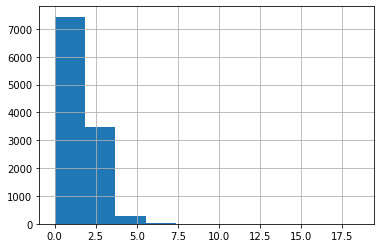

In [17]:
df['bathrooms'].hist();

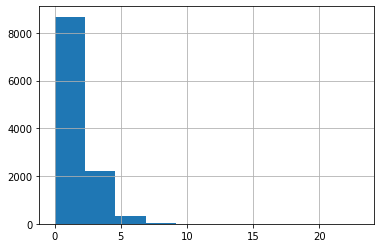

In [18]:
df['bedrooms'].hist();

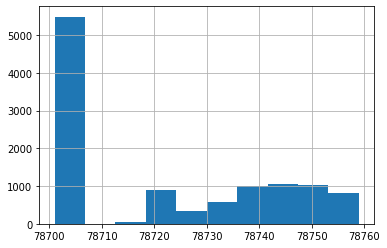

In [19]:
df['neighbourhood_cleansed'].hist();

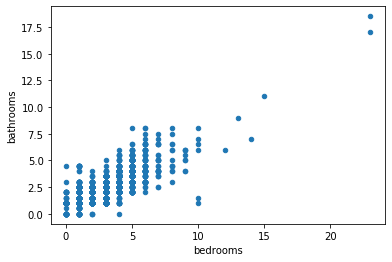

In [20]:
df.plot.scatter(x='bedrooms', y='bathrooms');

In [ ]:
fgfg:
    

# Feature Engineering

## Extracting amenities

In [21]:
# amenities are currently saved as a string
# step one is to break it into a list of standard format

def am_to_list(amenities):
    li = amenities.split(",")

    for i in range(len(li)):
        li[i] = li[i].replace('"', '')
        li[i] = li[i].replace("'", '')
        li[i] = li[i].strip("{")
        li[i] = li[i].strip("}")

    return li

In [22]:
# create improved amenities column

df['am_list'] = df['amenities'].apply(am_to_list)

df.head()

,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_list
0,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,3 months ago,t,0,0,0,0,2019-11-13,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.18,"[TV, Cable TV, Internet, Wifi, Air conditionin..."
1,2019-11-13,2008-08-23,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,5 months ago,t,0,0,0,0,2019-11-13,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,"[TV, Cable TV, Internet, Wifi, Air conditionin..."
2,2019-11-13,2009-02-16,"Austin, Texas, United States",within a few hours,100%,t,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,Austin,78702,"Austin, TX",30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,6 days ago,t,10,24,54,304,2019-11-13,508,47,2009-03-08,2019-10-28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.90,"[TV, Wifi, Air conditioning, Kitchen, Pets liv..."
3,2019-11-13,2009-02-19,"Austin, Texas, United States",within an hour,100%,t,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729,Austin,78729,"Austin, TX",30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,2 days ago,t,0,3,13,13,2019-11-13,257,19,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,f,f,moderate,t,t,1,0,1,0,2.20,"[TV, Cable TV, Internet, Wifi, Air conditionin..."
4,2019-11-13,2009-04-17,"Austin, Texas, United States",within an hour,100%,t,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"A